### Project 6 - Anomaly Detection

The dataset contains real time traffic data from the Twin Cities Metro area in Minnesota, collected by the Minnesota Department of Transportation. Included metrics include occupancy, speed, and travel time from specific sensors. This dataset has speeds for vehicles captured by different sensors. Here, we have considered the car speeding data only,

The overall goal is to build one or more Build one or more anomaly detection models to determine the anomalies using the other columns as features

The dataset can be found at: https://www.kaggle.com/boltzmannbrain/nab

Reference: References used: 1) http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html
2) https://towardsdatascience.com/outlier-detection-with-isolation-forest-3d190448d45e
3) youtube.com/watch?v=gCWBFyFTxVU

We begin by analyzing the column features

1) Analyzing data from the source datasets We import the required modules

In [170]:
from pandas import DataFrame, read_csv

import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import sys 
import math

%matplotlib inline
import matplotlib 
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn import preprocessing
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from scipy import stats

To get familiar with the features column, we load the data form the source into the dataframe

In [171]:
df_speed1=pd.read_csv('C:/Users/a687u420/OneDrive - The University of Kansas/KU courses/Fall 2020/Class Assignments/6 Anomaly Detection\Data\speed_6005.csv', low_memory = False)
df_speed2=pd.read_csv('C:/Users/a687u420/OneDrive - The University of Kansas/KU courses/Fall 2020/Class Assignments/6 Anomaly Detection\Data\speed_7578.csv', low_memory = False)
df_speed3=pd.read_csv('C:/Users/a687u420/OneDrive - The University of Kansas/KU courses/Fall 2020/Class Assignments/6 Anomaly Detection\Data\speed_t4013.csv', low_memory = False)


Since we have three data sets on car speeding, we will link all the data files to to a new dataframe "speed"

In [172]:
df_speed = pd.concat([df_speed1,df_speed2,df_speed3])
df_speed.shape

(6122, 2)

As observed we have around 6122 rows, and 2 columns namely "timestamp" and the "value"

In [173]:
df_speed.dtypes

timestamp    object
value         int64
dtype: object

In [174]:
df_speed.head(10)

,timestamp,value
0,2015-08-31 18:22:00,90
1,2015-08-31 18:32:00,80
2,2015-08-31 18:57:00,84
3,2015-08-31 19:07:00,94
4,2015-08-31 19:12:00,90
5,2015-08-31 19:17:00,91
6,2015-08-31 19:47:00,62
7,2015-08-31 20:12:00,96
8,2015-08-31 20:27:00,75
9,2015-08-31 20:42:00,84


In [175]:
df_speed.info()  # checking for any null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6122 entries, 0 to 2494
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  6122 non-null   object
 1   value      6122 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 143.5+ KB


In [176]:
df_speed[df_speed.isnull().any(axis=1)].count()

timestamp    0
value        0
dtype: int64

We will print the data description by calcualting the mean values of all the count,

In [177]:
print(df_speed.describe())

             value
count  6122.000000
mean     70.887128
std      11.912310
min       1.000000
25%      63.000000
50%      67.000000
75%      80.000000
max     109.000000


70.88712838941522


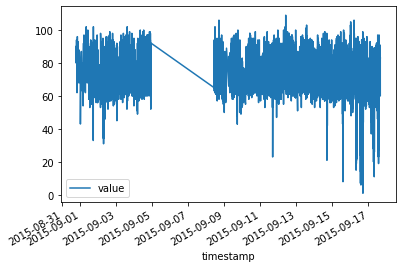

In [178]:
print(df_speed['value'].mean())
df_speed['timestamp'] = pd.to_datetime(df_speed['timestamp'])
df_speed.plot(x='timestamp', y='value')

This plot does not provide a better idea, however, based on the data description we will classify the car speeding outlier ranges. As per US free highway state laws, driving above 80 mph is considered to be speeding, hence we will classify based on speeding (>80) and normal driving (<=80). Additionally, a group column will be created to group normal cases as 0 and speeding case as 1.

In [179]:
df_speed['group'] = df_speed['value']
df_speed.loc[df_speed['value'] >80, 'group'] = 1
df_speed.loc[df_speed['value'] <=80, 'group'] = 0

In [180]:
df_speed.head(10)

,timestamp,value,group
0,2015-08-31 18:22:00,90,1
1,2015-08-31 18:32:00,80,0
2,2015-08-31 18:57:00,84,1
3,2015-08-31 19:07:00,94,1
4,2015-08-31 19:12:00,90,1
5,2015-08-31 19:17:00,91,1
6,2015-08-31 19:47:00,62,0
7,2015-08-31 20:12:00,96,1
8,2015-08-31 20:27:00,75,0
9,2015-08-31 20:42:00,84,1


from the above dataset, we will found the number of normal and speeding cases, and calculate the percentage of the speeding cases. Also, mean speed calcuate is 70, with a min of 1 mph and max of 109 mph

In [181]:
speeding = df_speed[df_speed['group']==1]
normal = df_speed[df_speed['group']==0]

speeding_fraction = len(speeding)/float(len(normal)) # outlier fraction

print('Speeding cases: {}'.format(len(speeding)))
print('Normal cases: {}'.format(len(normal)))
print('Fraction of speeding cases: {}'.format(speeding_fraction))

Speeding cases: 1485
Normal cases: 4637
Fraction of speeding cases: 0.3202501617425059


from the total of 6122 cases, around 1485 cases are considered to be speeding and the speeding contribution is around 32%. We will viaulize this by histogram plots

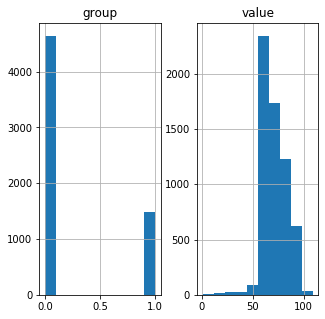

In [182]:
df_speed.hist(figsize=(5,5))
plt.show()

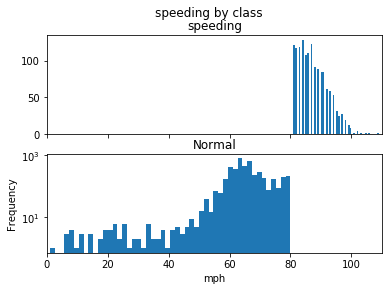

In [183]:
## We need to analyze more amount of information from the speed data
#How different are the speeding values versus the occurences/frequency?

LABELS = ["Normal", "speeding"]

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('speeding by class')
bins = 50
ax1.hist(speeding.value, bins = bins)
ax1.set_title('speeding')
ax2.hist(normal.value, bins = bins)
ax2.set_title('Normal')
plt.xlabel('mph')
plt.ylabel('Frequency')
plt.xlim((0, 110))
plt.yscale('log')
plt.show();

Also, here the timestamp values provides no relevant meaning to understand the data analysis and outliers hence we will drop that particlaur column - Feature engineering

We will create independent and dependent features for model testing
Source : https://github.com/krishnaik06/Credit-Card-Fraudlent/blob/master/Anamoly%20Detection.ipynb

In [184]:
#Create independent and Dependent Features
columns = df_speed.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["group", "timestamp"]]
# Store the variable we are predicting 
target = "group"
# Define a random state 
state = np.random.RandomState(42)
X = df_speed[columns]
Y = df_speed[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)


(6122, 1)
(6122,)


The variable we are predicting (group) is Y and the speed is X.

# Model Prediction

1) Isolation forest algorithm -  
The algorithm is based on the fact that anomalies are data points that are few and different. As a result of these properties, anomalies are susceptible to a mechanism called isolation.

2) Local Outlier Factor(LOF) Algorithm - The LOF algorithm is an unsupervised outlier detection method which computes the local density deviation of a given data point with respect to its neighbors.We calculate anomaly scores based on the neighbors. Isolation Factor isolates the observations by randomly selecting a feature and randomly selecting a split value between the maximum and minimum value of the selected feature.

3) Support vector machines - one-class SVM could also be used in an unsupervised anomaly detection setup, where no prior training is conducted. Unfortunately, it turns out that a one-class SVM is sensitive to outliers in the data.

In [185]:
##Define the outlier detection methods

dict_classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=speeding_fraction,random_state=1, verbose=0),
    
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, contamination=speeding_fraction),
    
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3)
   
}

In [186]:
type(classifiers)

dict

In [187]:
n_outliers = len(speeding)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
        
    #Reshape the prediction values to 0 for Valid transactions , 1 for speeding
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

Isolation Forest: 1094
Accuracy Score :
0.8213002286834368
Classification Report :
              precision    recall  f1-score   support

           0       0.91      0.84      0.88      4637
           1       0.61      0.75      0.67      1485

    accuracy                           0.82      6122
   macro avg       0.76      0.80      0.77      6122
weighted avg       0.84      0.82      0.83      6122

Local Outlier Factor: 1535
Accuracy Score :
0.749264946096047
Classification Report :
              precision    recall  f1-score   support

           0       0.76      0.98      0.86      4637
           1       0.31      0.03      0.05      1485

    accuracy                           0.75      6122
   macro avg       0.54      0.50      0.45      6122
weighted avg       0.65      0.75      0.66      6122

Support Vector Machine: 2434
Accuracy Score :
0.6024175106174453
Classification Report :
              precision    recall  f1-score   support

           0       0.88      0.55

Higher accuracvy score corresponds to a better model. After trying three diffeent classifier models,we observe,

1) Isolation forests detects 1094 errors with an accuracy of 82.13%
2) Local Outlier Factor detects 1535 errors with an accuracy of 74.92%
3) Support Vector Machine detects 2434 errors with an accuracy of 60.24%
4) When comparing error, precision, accuracy score & recall for 3 models , the Isolation Forest performed much better than the LOF and SVM models